In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
from sklearn.datasets import *
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve
from sklearn.cross_validation import cross_val_score
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import TimeSeriesSplit,KFold
from sklearn import cross_validation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf
from sklearn.utils import shuffle
import random
import gensim
import warnings
warnings.filterwarnings('ignore')

In [3]:
final_data=pd.read_csv('Amazon.csv')

In [4]:
final_data.sort_values('Time',ascending=True)
final_data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read nice rhythm well good ...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...


In [24]:
tscv=TimeSeriesSplit(n_splits=2)
for train_index,test_index in tscv.split(final_data):
    print("Train:", train_index,"Test:", test_index)
    train_data,test_data = final_data.iloc[train_index],final_data.iloc[test_index]

Train: [     0      1      2 ..., 121388 121389 121390] Test: [121391 121392 121393 ..., 242778 242779 242780]
Train: [     0      1      2 ..., 242778 242779 242780] Test: [242781 242782 242783 ..., 364168 364169 364170]


In [27]:
#Training data
train_data=shuffle(train_data)
reviews=train_data['Score']
reviews=reviews[50000:70000]
train_data=train_data[50000:70000]

In [31]:
#Test data
test_data=shuffle(test_data)
test_review=test_data['Score']
test_review=test_review[80000:85000]
test_data=test_data[80000:85000]

In [33]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
train_counts = count_vect.fit_transform(train_data['CleanText'].values)
train_counts.shape

(20000, 19712)

In [34]:
test_count = count_vect.transform(test_data['CleanText'].values)
test_count.shape

(5000, 19712)

[0.87495093115023259, 0.87395078095019518, 0.87620103132525773, 0.87455153135038288, 0.87360038090009517, 0.87415065613766407, 0.87250093085023273, 0.87280128085032016, 0.87360085596271397, 0.87240053072513268, 0.87170088072522012, 0.8740007811251953, 0.87345093102523264, 0.87200058072514497, 0.87320025596256401, 0.87310070583767652, 0.87220058067514528, 0.87240065581266391]

The optimal number of models is 40.


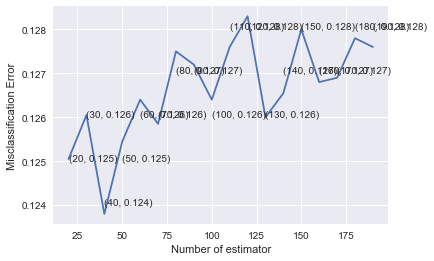

the misclassification error for each i value is :  [ 0.125  0.126  0.124  0.125  0.126  0.126  0.127  0.127  0.126  0.128
  0.128  0.126  0.127  0.128  0.127  0.127  0.128  0.128]


In [35]:
estimator = list(range(20,200,10))
cv_scores = []

# perform 10-fold cross validation
for i in estimator:
    rfc = RandomForestClassifier(n_estimators=i)
    scores = cross_val_score(rfc,train_counts,reviews, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_num = estimator[MSE.index(min(MSE))]
print('\nThe optimal number of models is %d.' % optimal_num)

# plot misclassification error vs depth 
plt.plot(estimator, MSE)

for xy in zip(estimator, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of estimator')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each i value is : ", np.round(MSE,3))